# Education

## Introduction

This project addresses inequality of educational opportunity in U.S. high schools. Here we will focus on average student performance on the ACT exams that students take as part of the college application process. Specifically, whether any socio-economic factors that affect the average ACT scores of the schools.

## Data collection

Edgap dataset : https://www.edgap.org
School Information data : https://github.com/brian-fischer/DATA-5100
School data : https://nces.ed.gov/programs/edge/

#### Importing essential libraries

In [3]:
# Import pandas, numpy and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#import seaborn 
import seaborn as sns

#plotting style
sns.set_style("whitegrid")

import warnings
warnings.filterwarnings("ignore", message="Unknown extension is not supported and will be removed")


### Loading datasets

In [4]:
# load edgap dataset
edgap = pd.read_excel("../data/EdGap_data.xlsx", dtype = {"NCESSCH School ID": object})

In [5]:
# load school_information dataset
school_information = pd.read_csv("../data/school_info.csv", encoding='unicode escape', low_memory=False)

In [6]:
# load school characteristics dataset
school = pd.read_csv("../data/Public_School_Characteristics_2018-19.csv")

### Explore the contents of the data sets

Getting first 5 rows of the datasets

In [7]:
edgap.head()

NCESSCH School ID  CT Unemployment Rate  CT Pct Adults with College Degree  \
0      100001600143              0.117962                           0.445283   
1      100008000024              0.063984                           0.662765   
2      100008000225              0.056460                           0.701864   
3      100017000029              0.044739                           0.692062   
4      100018000040              0.077014                           0.640060   

   CT Pct Childre In Married Couple Family  CT Median Household Income  \
0                                 0.346495                     42820.0   
1                                 0.767619                     89320.0   
2                                 0.713090                     84140.0   
3                                 0.641283                     56500.0   
4                                 0.834402                     54015.0   

   School ACT average (or equivalent if SAT score)  \
0                                        20.433455   
1                                        19.498168   
2                                        19.554335   
3                                        17.737485   
4                                        18.245421   

   School Pct Free and Reduced Lunch  
0                           0.066901  
1                           0.112412  
2                           0.096816  
3                           0.296960  
4                           0.262641

In [8]:
pd.set_option('display.max_columns', None)
school_information.head()

SCHOOL_YEAR  FIPST STATENAME  ST                          SCH_NAME  \
0   2016-2017      1   ALABAMA  AL  Sequoyah Sch - Chalkville Campus   
1   2016-2017      1   ALABAMA  AL                             Camps   
2   2016-2017      1   ALABAMA  AL                           Det Ctr   
3   2016-2017      1   ALABAMA  AL     Wallace Sch - Mt Meigs Campus   
4   2016-2017      1   ALABAMA  AL         McNeel Sch - Vacca Campus   

                 LEA_NAME STATE_AGENCY_NO  UNION ST_LEAID    LEAID  \
0  Alabama Youth Services              01    NaN   AL-210  0100002   
1  Alabama Youth Services              01    NaN   AL-210  0100002   
2  Alabama Youth Services              01    NaN   AL-210  0100002   
3  Alabama Youth Services              01    NaN   AL-210  0100002   
4  Alabama Youth Services              01    NaN   AL-210  0100002   

      ST_SCHID       NCESSCH     SCHID           MSTREET1 MSTREET2 MSTREET3  \
0  AL-210-0020  1.000020e+10  100277.0       P O Box 9486      NaN      NaN   
1  AL-210-0050  1.000020e+10  101667.0         P O Box 66      NaN      NaN   
2  AL-210-0060  1.000020e+10  101670.0         P O Box 66      NaN      NaN   
3  AL-210-0030  1.000020e+10  101705.0         P O Box 66      NaN      NaN   
4  AL-210-0040  1.000020e+10  101706.0  8950 Roebuck Blvd      NaN      NaN   

         MCITY MSTATE   MZIP MZIP4                     LSTREET1 LSTREET2  \
0   Birmingham     AL  35220   NaN  1000 Industrial School Road      NaN   
1     Mt Meigs     AL  36057   NaN           1601 County Rd. 57      NaN   
2     Mt Meigs     AL  36057   NaN       2109 Bashi Rd Bldg 509      NaN   
3  Mount Meigs     AL  36057   NaN  1000 Industrial School Road      NaN   
4   Birmingham     AL  35206   NaN            8950 Roebuck Blvd      NaN   

  LSTREET3        LCITY LSTATE   LZIP LZIP4          PHONE  \
0      NaN   Birmingham     AL  35220   NaN  (205)680-8574   
1      NaN   Prattville     AL  36067   NaN  (334)215-3850   
2      NaN  Thomasville     AL  36784   NaN  (334)215-3850   
3      NaN  Mount Meigs     AL  36057   NaN  (334)215-6039   
4      NaN   Birmingham     AL  35206   NaN  (205)838-4981   

                      WEBSITE SY_STATUS SY_STATUS_TEXT UPDATED_STATUS  \
0  http://www.dys.alabama.gov         1           Open              1   
1  http://www.dys.alabama.gov         1           Open              1   
2  http://www.dys.alabama.gov         1           Open              1   
3  http://www.dys.alabama.gov         1           Open              1   
4  http://www.dys.alabama.gov         1           Open              1   

  UPDATED_STATUS_TEXT EFFECTIVE_DATE       SCH_TYPE_TEXT SCH_TYPE  \
0                Open     03/03/2010  Alternative School        4   
1                Open     03/03/2010  Alternative School        4   
2                Open     03/03/2010  Alternative School        4   
3                Open     03/03/2010  Alternative School        4   
4                Open     03/03/2010  Alternative School        4   

  RECON_STATUS OUT_OF_STATE_FLAG CHARTER_TEXT CHARTAUTH1 CHARTAUTHN1  \
0           No                No           No        NaN         NaN   
1           No                No           No        NaN         NaN   
2           No                No           No        NaN         NaN   
3           No                No           No        NaN         NaN   
4           No                No           No        NaN         NaN   

  CHARTAUTH2 CHARTAUTHN2 NOGRADES G_PK_OFFERED G_KG_OFFERED G_1_OFFERED  \
0        NaN         NaN       No           No           No          No   
1        NaN         NaN       No           No           No          No   
2        NaN         NaN       No           No           No          No   
3        NaN         NaN       No           No           No          No   
4        NaN         NaN       No           No           No          No   

  G_2_OFFERED G_3_OFFERED G_4_OFFERED G_5_OFFERED G_6_OFFERED G_7_OFFERED  \
0          No          No   

In [9]:
school.head()

X             Y  OBJECTID      NCESSCH   SURVYEAR STABR   LEAID  \
0 -1.662643e+07  8.771252e+06         1  20051000480  2018-2019    AK  200510   
1 -1.744980e+07  1.150580e+07         2  20061000470  2018-2019    AK  200610   
2 -1.681706e+07  8.509991e+06         3  20039000448  2018-2019    AK  200390   
3 -1.684031e+07  8.527365e+06         4  20039000463  2018-2019    AK  200390   
4 -1.683510e+07  8.527088e+06         5  20039000513  2018-2019    AK  200390   

  ST_LEAID                                   LEA_NAME  \
0    AK-33  Matanuska-Susitna Borough School District   
1    AK-36        North Slope Borough School District   
2    AK-24    Kenai Peninsula Borough School District   
3    AK-24    Kenai Peninsula Borough School District   
4    AK-24    Kenai Peninsula Borough School District   

                                SCH_NAME            LSTREET1 LSTREET2  \
0                   John Shaw Elementary  3750 E Paradise Ln      NaN   
1               Kiita Learning Community      5246 Karluk St      NaN   
2     Soldotna Montessori Charter School      158 E Park Ave      NaN   
3  Kaleidoscope School of Arts & Science     549 N Forest Dr      NaN   
4                        Marathon School     405 Marathon Rd      NaN   

       LCITY LSTATE   LZIP LZIP4          PHONE GSLO GSHI      VIRTUAL  \
0    Wasilla     AK  99654        (907)352-0500   PK   05  Not Virtual   
1  Utqiagvik     AK  99723        (907)852-9677   09   12  Not Virtual   
2   Soldotna     AK  99669        (907)260-9221   KG   06  Not Virtual   
3      Kenai     AK  99611        (907)283-0804   KG   05  Not Virtual   
4      Kenai     AK  99611        (907)335-3343   07   12  Not Virtual   

   TOTFRL  FRELCH  REDLCH    PK    KG   G01   G02   G03   G04   G05   G06  \
0     205     178      27  14.0  95.0  80.0  70.0  87.0  64.0  58.0   NaN   
1      16      14       2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2      45      25      20   NaN  21.0  23.0  23.0  25.0  22.0  24.0  25.0   
3      81      58      23   NaN  40.0  44.0  44.0  42.0  43.0  45.0   NaN   
4       3      -1      -1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

   G07  G08  G09  G10   G11   G12  G13  TOTAL  MEMBER    AM    HI   BL     WH  \
0  NaN  NaN  NaN  NaN   NaN   NaN  NaN  468.0   468.0  56.0  12.0  4.0  367.0   
1  NaN  NaN  0.0  2.0  10.0  29.0  NaN   41.0    41.0  35.0   1.0  0.0    2.0   
2  NaN  NaN  NaN  NaN   NaN   NaN  NaN  163.0   163.0   8.0   5.0  0.0  137.0   
3  NaN  NaN  NaN  NaN   NaN   NaN  NaN  258.0   258.0  17.0  16.0  3.0  169.0   
4  1.0  1.0  0.0  2.0   2.0   3.0  NaN    9.0     9.0   1.0   0.0  0.0    7.0   

    HP    TR    FTE     LATCOD      LONCOD           ULOCALE  \
0  4.0  22.0  25.10  61.627140 -149.357863  41-Rural: Fringe   
1  1.0   2.0   3.70  71.300337 -156.754238   33-Town: Remote   
2  0.0  10.0  10.35  60.491445 -151.070167   33-Town: Remote   
3  0.0  50.0  16.25  60.568277 -151.279143   33-Town: Remote   
4  0.0   1.0   1.00  60.567003 -151.232337   33-Town: Remote   

                      NMCNTY  STUTERATIO          TITLEI         STITLEI  \
0  Matanuska-Susitna Borough        18.6           1-Yes           1-Yes   
1        North Slope Borough        11.1           1-Yes           1-Yes   
2    Kenai Peninsula Borough        15.7  Not Applicable  Not Applicable   
3    Kenai Peninsula Borough        15.9  Not Applicable  Not Applicable   
4    Kenai Peninsula Borough         9.0           1-Yes            2-No   

   AMALM  AMALF  ASALM  ASALF  HIALM  HIALF  BLALM  BLALF  WHALM  WHALF  \
0   34.0   22.0    1.0    2.0    6.0    6.0    2.0    2.0  199.0  168.0   
1   23.0   12.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0    2.0   
2    4.0    4.0    0.0    3.0    1.0    4.0    0.0    0.0   58.0   79.0   
3   12.0    5.0    2.0    1.0    8.0    8.0    3.0    0.0   73.0   96.0   
4    1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    6.0    1.0   

   HPALM  HPALF  TRALM  TRALF  TOTMENROL  TOTFENROL  STAT

Get some of the information from the datasets like columns data types, number of rows and columns and number of missing values.

In [10]:
edgap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7986 entries, 0 to 7985
Data columns (total 7 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   NCESSCH School ID                                7986 non-null   object 
 1   CT Unemployment Rate                             7972 non-null   float64
 2   CT Pct Adults with College Degree                7973 non-null   float64
 3   CT Pct Childre In Married Couple Family          7961 non-null   float64
 4   CT Median Household Income                       7966 non-null   float64
 5   School ACT average (or equivalent if SAT score)  7986 non-null   float64
 6   School Pct Free and Reduced Lunch                7986 non-null   float64
dtypes: float64(6), object(1)
memory usage: 436.9+ KB


In [11]:
school_information.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102183 entries, 0 to 102182
Data columns (total 65 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SCHOOL_YEAR          102183 non-null  object 
 1   FIPST                102183 non-null  int64  
 2   STATENAME            102183 non-null  object 
 3   ST                   102183 non-null  object 
 4   SCH_NAME             102183 non-null  object 
 5   LEA_NAME             102183 non-null  object 
 6   STATE_AGENCY_NO      102183 non-null  object 
 7   UNION                2533 non-null    float64
 8   ST_LEAID             102183 non-null  object 
 9   LEAID                102183 non-null  object 
 10  ST_SCHID             102183 non-null  object 
 11  NCESSCH              102181 non-null  float64
 12  SCHID                102181 non-null  float64
 13  MSTREET1             102181 non-null  object 
 14  MSTREET2             1825 non-null    object 
 15  MSTREET3         

In [12]:
school.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100719 entries, 0 to 100718
Data columns (total 79 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   X                 100719 non-null  float64
 1   Y                 100719 non-null  float64
 2   OBJECTID          100719 non-null  int64  
 3   NCESSCH           100719 non-null  int64  
 4   SURVYEAR          100719 non-null  object 
 5   STABR             100719 non-null  object 
 6   LEAID             100719 non-null  int64  
 7   ST_LEAID          100719 non-null  object 
 8   LEA_NAME          100719 non-null  object 
 9   SCH_NAME          100719 non-null  object 
 10  LSTREET1          100718 non-null  object 
 11  LSTREET2          597 non-null     object 
 12  LCITY             100719 non-null  object 
 13  LSTATE            100719 non-null  object 
 14  LZIP              100719 non-null  int64  
 15  LZIP4             100719 non-null  object 
 16  PHONE             10

Plotting pairplot to see the relationships between variables

Edgap dataset is an important dataset and we need all the columns from it. Plotting pair plot between the variables shows the distributions of one another.

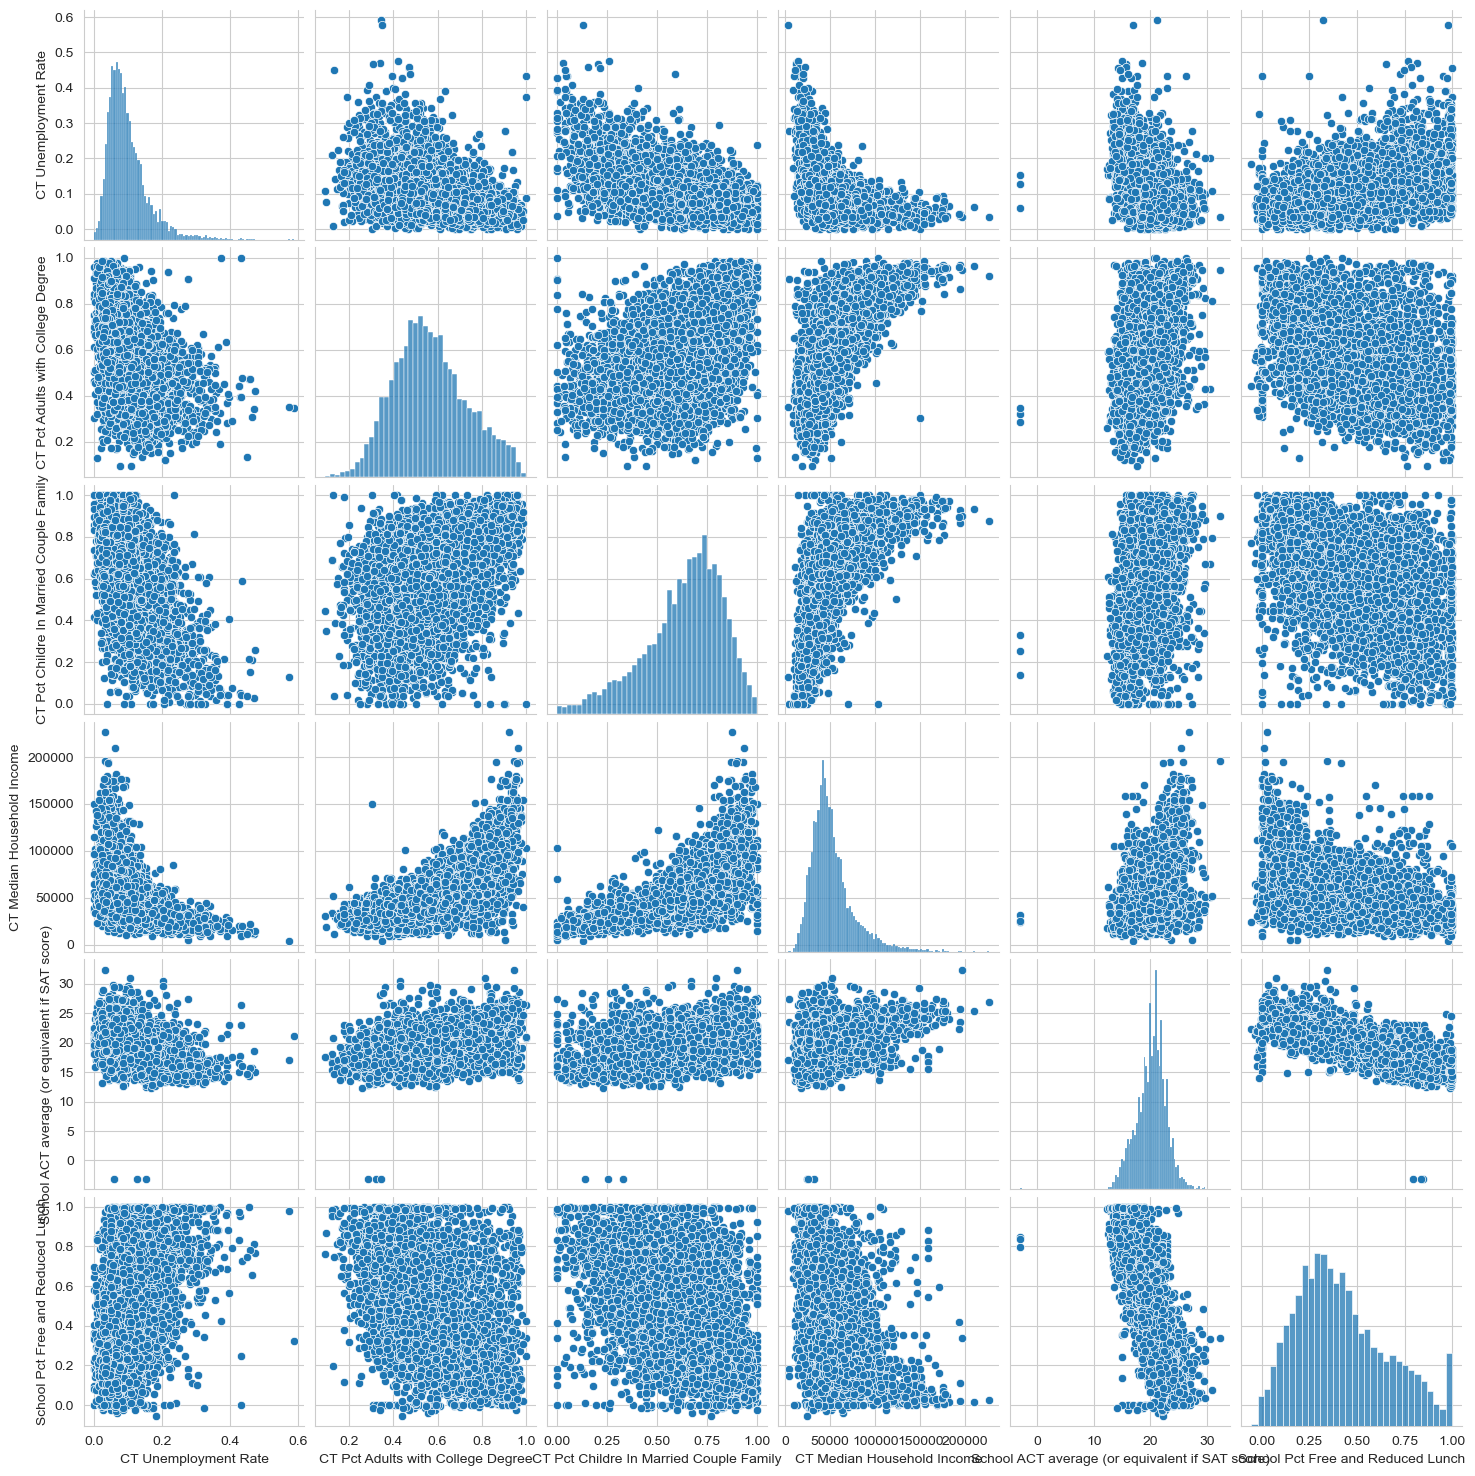

In [13]:
sns.pairplot(edgap.drop(columns = "NCESSCH School ID"));

plt.show()

From the pair plot, we can notice that "CT Median Household Income" and "CT Unemployment rate" columns are right skewed.

"ACT average" values are normally distributed.

We can see some of the  linear patterns among the variables.

Add regression lines and format the pair plot

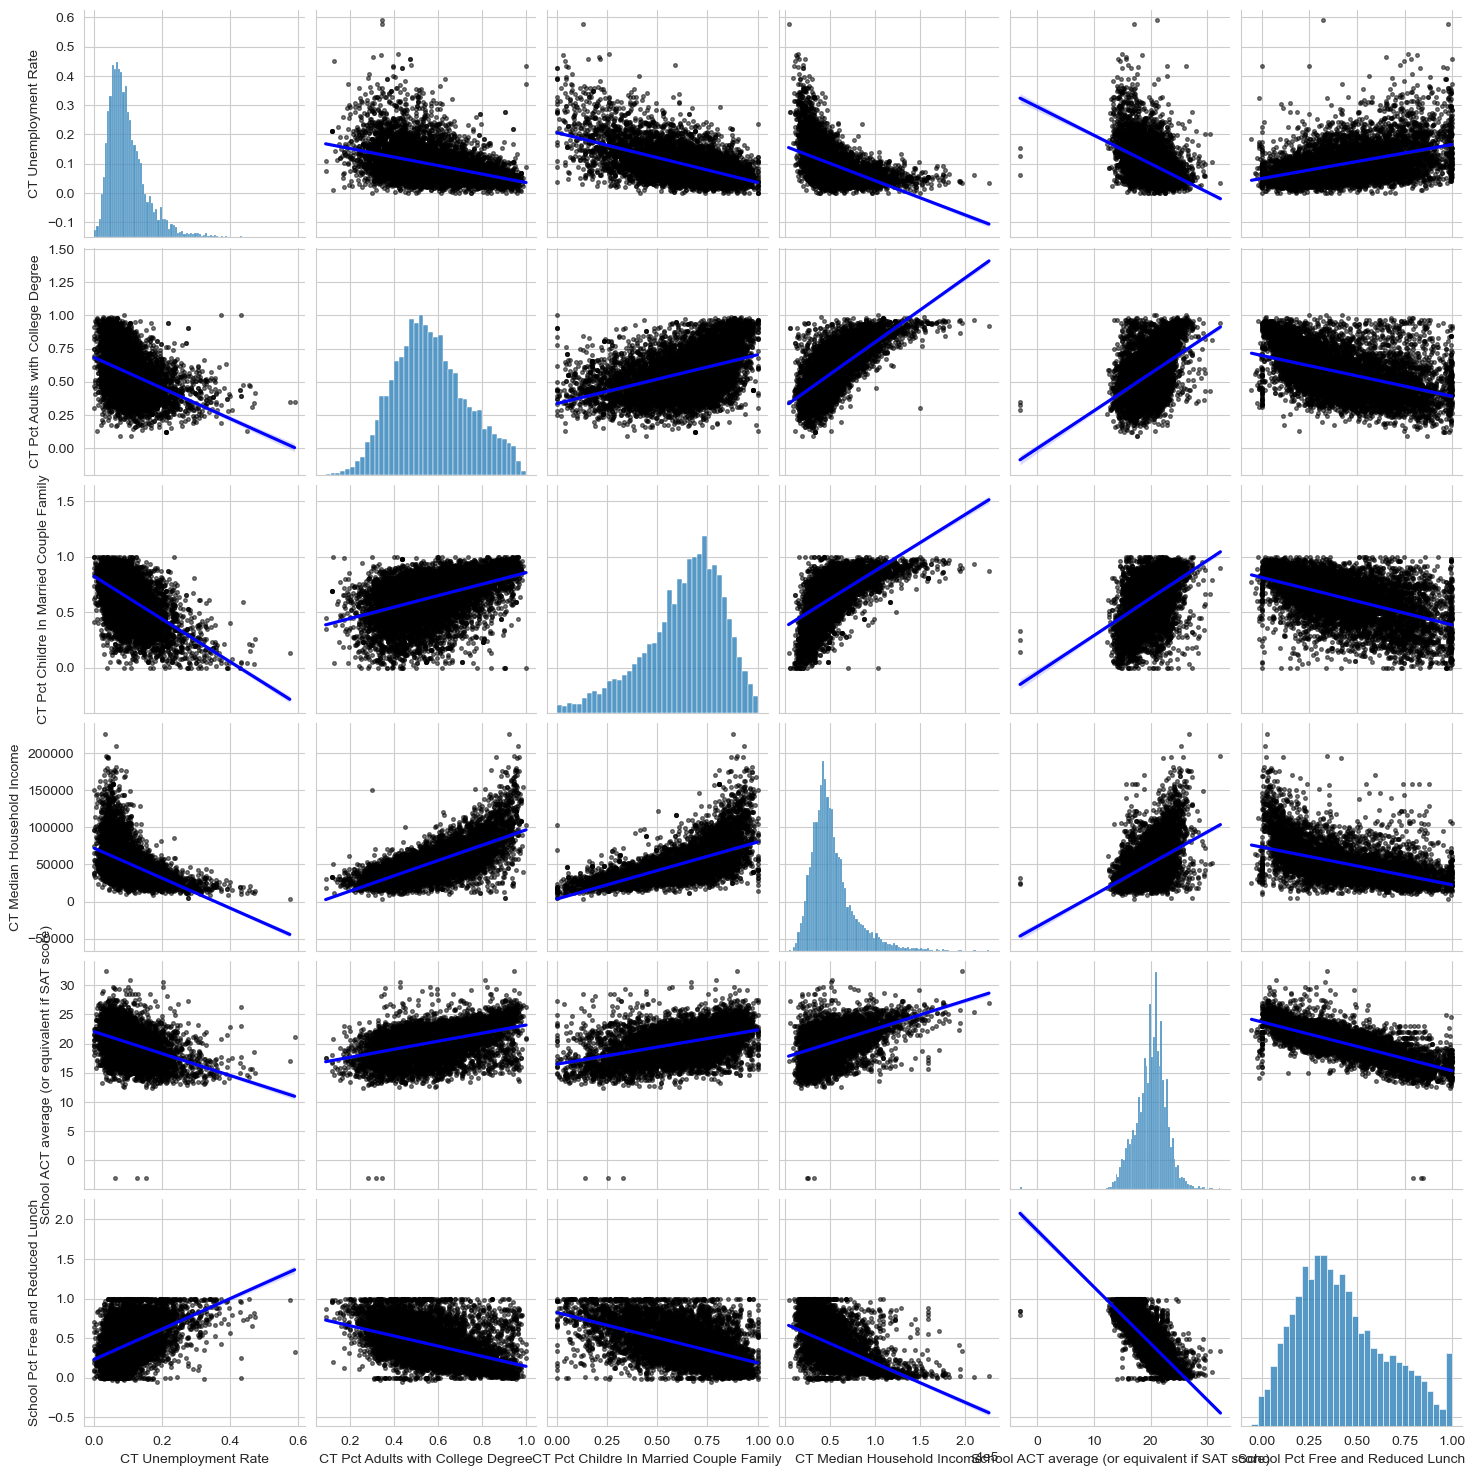

In [14]:
fig = sns.pairplot(edgap.drop(columns = "NCESSCH School ID"),
                  kind = "reg",
                  plot_kws = {
                      "line_kws": {"color": "blue"},
                      "scatter_kws": {"alpha": 0.5, "color": "k", "s": 7}
                  })

for ax in fig.axes.flat:
    if ax.get_xlabel() == 'CT Median Household Income': 
        ax.ticklabel_format(style = 'sci', axis = 'x', scilimits = (0,0))  # Apply scientific notation
        ax.set_xlabel(ax.get_xlabel(), fontsize = 8, rotation = 30, ha = 'right')   #X-axis label size and rotation
        ax.set_ylabel(ax.get_ylabel(), fontsize = 8)  #Y-axis label size
        
        # Rotate x-axis tick labels
        plt.setp(ax.get_xticklabels(), rotation = 30, ha = 'right')
        
        plt.show()

After adding regression lines and colors, the graph is well vivid than before.

We can see some linear correlation between some of the variables.

This indicates that we can use this dataset for further analysis.

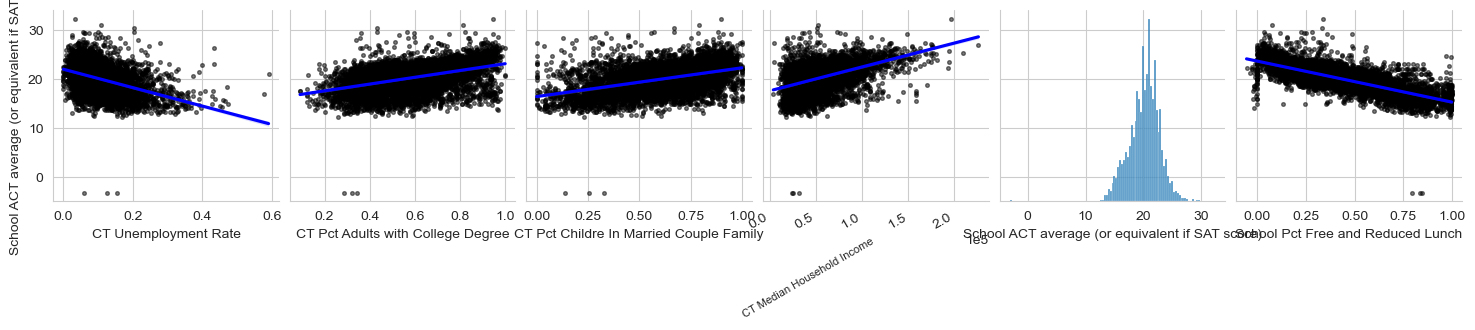

In [15]:
fig = sns.pairplot(edgap.drop(columns = "NCESSCH School ID"),
                  y_vars = ["School ACT average (or equivalent if SAT score)"], 
                  kind = "reg",
                  plot_kws = {
                      "line_kws": {"color": "blue"},
                      "scatter_kws": {"alpha": 0.5, "color": "k", "s": 7}
                  })

for ax in fig.axes.flat:
    if ax.get_xlabel() == 'CT Median Household Income': 
        ax.ticklabel_format(style = 'sci', axis = 'x', scilimits = (0,0))  # Apply scientific notation
        ax.set_xlabel(ax.get_xlabel(), fontsize = 8, rotation = 30, ha = 'right')   #X-axis label size and rotation
        ax.set_ylabel(ax.get_ylabel(), fontsize = 8)  #Y-axis label size
        
        # Rotate x-axis tick labels
        plt.setp(ax.get_xticklabels(), rotation = 30, ha = 'right')
        
        plt.show()

### Data Preparation

Selecting relevant columns from school_information and school datasets.

In [16]:
school_information = school_information[['SCHOOL_YEAR','NCESSCH','LSTATE','LZIP','SCH_TYPE_TEXT','LEVEL','CHARTER_TEXT','ST_SCHID']]

In [17]:
school_information.head()

SCHOOL_YEAR       NCESSCH LSTATE   LZIP       SCH_TYPE_TEXT LEVEL  \
0   2016-2017  1.000020e+10     AL  35220  Alternative School  High   
1   2016-2017  1.000020e+10     AL  36067  Alternative School  High   
2   2016-2017  1.000020e+10     AL  36784  Alternative School  High   
3   2016-2017  1.000020e+10     AL  36057  Alternative School  High   
4   2016-2017  1.000020e+10     AL  35206  Alternative School  High   

  CHARTER_TEXT     ST_SCHID  
0           No  AL-210-0020  
1           No  AL-210-0050  
2           No  AL-210-0060  
3           No  AL-210-0030  
4           No  AL-210-0040

In [18]:
school = school[["NCESSCH","STUTERATIO"]]

In [19]:
school.head()

NCESSCH  STUTERATIO
0  20051000480        18.6
1  20061000470        11.1
2  20039000448        15.7
3  20039000463        15.9
4  20039000513         9.0

Rename columns

Renaming the columns which has capital letters and short forms to lower case and describing column names.

'NCESSH' name in the three datasets should be changed to 'id', easier for merging all the datasets.

In [20]:
edgap.columns

Index(['NCESSCH School ID', 'CT Unemployment Rate',
       'CT Pct Adults with College Degree',
       'CT Pct Childre In Married Couple Family', 'CT Median Household Income',
       'School ACT average (or equivalent if SAT score)',
       'School Pct Free and Reduced Lunch'],
      dtype='object')

In [21]:
edgap = edgap.rename(columns = {
    "NCESSCH School ID": "id",
    "CT Pct Adults with College Degree": "percent_college",
    "CT Unemployment Rate": "rate_unemployment",
    "CT Pct Childre In Married Couple Family": "percent_married",
    "CT Median Household Income": "median_income",
    "School ACT average (or equivalent if SAT score)": "average_act",
    "School Pct Free and Reduced Lunch": "percent_lunch"
})

In [22]:
school_information.columns

Index(['SCHOOL_YEAR', 'NCESSCH', 'LSTATE', 'LZIP', 'SCH_TYPE_TEXT', 'LEVEL',
       'CHARTER_TEXT', 'ST_SCHID'],
      dtype='object')

In [23]:
school_information = school_information.rename(columns = {
    "SCHOOL_YEAR": "year",
    "NCESSCH": "id",
    "LSTATE": "state",
    "LZIP": "zip_code",
    "SCH_TYPE_TEXT": "school_type",
    "LEVEL": "school_level",
    "CHARTER_TEXT": "charter",
    "ST_SCHID": "state_id"
})

In [24]:
school.columns

Index(['NCESSCH', 'STUTERATIO'], dtype='object')

In [25]:
school = school.rename(columns = {
    "NCESSCH" : "id",
    "STUTERATIO": "student_teacher_ratio"
})

Joining dataframes

In school_information data, 'id' is a 'float64' data type. The data type should be changed to 'object'.

In [26]:
school_information['id'] = school_information['id'].astype('object')

In [27]:
school_information.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102183 entries, 0 to 102182
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   year          102183 non-null  object
 1   id            102181 non-null  object
 2   state         102183 non-null  object
 3   zip_code      102183 non-null  object
 4   school_type   102181 non-null  object
 5   school_level  102179 non-null  object
 6   charter       102179 non-null  object
 7   state_id      102183 non-null  object
dtypes: object(8)
memory usage: 6.2+ MB


In schools data also, the 'id' data type should be changed to object type.

In [28]:
school["id"] = school["id"].astype("object")

In [29]:
school.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100719 entries, 0 to 100718
Data columns (total 2 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     100719 non-null  object 
 1   student_teacher_ratio  96456 non-null   float64
dtypes: float64(1), object(1)
memory usage: 1.5+ MB


Joining all the three dataframes using the primary key 'id'. Here, we are using left join because we need all the rows from 
edgap and only the relevant rows to the edgap from the remaining dataframes.

In [30]:
df = edgap.merge(school_information,
                how = "left",
                on = "id").merge(school, how = "left", on = "id")

In [31]:
df.head()

id  rate_unemployment  percent_college  percent_married  \
0  100001600143           0.117962         0.445283         0.346495   
1  100008000024           0.063984         0.662765         0.767619   
2  100008000225           0.056460         0.701864         0.713090   
3  100017000029           0.044739         0.692062         0.641283   
4  100018000040           0.077014         0.640060         0.834402   

   median_income  average_act  percent_lunch       year state zip_code  \
0        42820.0    20.433455       0.066901  2016-2017    DE    19804   
1        89320.0    19.498168       0.112412  2016-2017    DE    19709   
2        84140.0    19.554335       0.096816  2016-2017    DE    19709   
3        56500.0    17.737485       0.296960  2016-2017    DE    19958   
4        54015.0    18.245421       0.262641  2016-2017    DE    19934   

      school_type school_level charter   state_id  student_teacher_ratio  
0  Regular School         High     Yes  DE-79-578                   22.3  
1  Regular School         High      No   DE-29-18                   16.7  
2  Regular School         High      No   DE-29-24                   15.9  
3  Regular School         High      No  DE-17-726                   15.1  
4  Regular School         High      No  DE-10-626                   15.3

Get information from the merged dataframe.

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7986 entries, 0 to 7985
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     7986 non-null   object 
 1   rate_unemployment      7972 non-null   float64
 2   percent_college        7973 non-null   float64
 3   percent_married        7961 non-null   float64
 4   median_income          7966 non-null   float64
 5   average_act            7986 non-null   float64
 6   percent_lunch          7986 non-null   float64
 7   year                   7898 non-null   object 
 8   state                  7898 non-null   object 
 9   zip_code               7898 non-null   object 
 10  school_type            7898 non-null   object 
 11  school_level           7898 non-null   object 
 12  charter                7898 non-null   object 
 13  state_id               7898 non-null   object 
 14  student_teacher_ratio  7748 non-null   float64
dtypes: f

Now, we have 7986 rows and 15 columns. In that, some columns have missing values.

#### Quality control

There are natural bounds for the numerical variables in the dataset. Check the maximum and minimum values in each column.

In [33]:
df.describe()

rate_unemployment  percent_college  percent_married  median_income  \
count        7972.000000      7973.000000      7961.000000    7966.000000   
mean            0.098730         0.568930         0.633440   52026.905222   
std             0.058959         0.165704         0.196764   24228.057079   
min             0.000000         0.091493         0.000000    3589.000000   
25%             0.058655         0.450828         0.523810   36597.250000   
50%             0.085649         0.554979         0.667594   46833.500000   
75%             0.123376         0.676571         0.777135   61369.250000   
max             0.590278         1.000000         1.000000  226181.000000   

       average_act  percent_lunch  student_teacher_ratio  
count  7986.000000    7986.000000            7748.000000  
mean     20.181532       0.420651              16.232331  
std       2.595201       0.239754               9.394468  
min      -3.070818      -0.054545              -2.000000  
25%      18.600000       0.238501              13.400000  
50%      20.400000       0.381570              15.700000  
75%      21.910867       0.575447              18.300000  
max      32.362637       0.998729             616.700000

In [34]:
#Alternate to the above method
df.select_dtypes(include = ['number']).agg(['min','max']).round(2)

rate_unemployment  percent_college  percent_married  median_income  \
min               0.00             0.09              0.0         3589.0   
max               0.59             1.00              1.0       226181.0   

     average_act  percent_lunch  student_teacher_ratio  
min        -3.07          -0.05                   -2.0  
max        32.36           1.00                  616.7

The minimum values of average_act, percent_lunch and student_teacher_ratio are not out-of-range values.

Set out-of-range values to NaN using np.nan

In [35]:
df.loc[df['percent_lunch'] < 0, 'percent_lunch'] = np.nan

In [36]:
df.loc[df['student_teacher_ratio'] < 0, 'student_teacher_ratio'] = np.nan

In [37]:
df.loc[df['average_act'] < 0, 'average_act'] = np.nan

Check the types, levels and charter status of schools

In [38]:
df['school_type'].value_counts()

Regular School                 7885
Alternative School               10
Special Education School          2
Career and Technical School       1
Name: school_type, dtype: int64

In [39]:
df['school_level'].value_counts()

High            7230
Other            631
Not reported      35
Elementary         2
Name: school_level, dtype: int64

In [40]:
df['charter'].value_counts()

No                7329
Yes                352
Not applicable     217
Name: charter, dtype: int64

Keep only the high schools

In [41]:
df = df.loc[df['school_level'] == 'High']

Check for any duplicated rows

In [42]:
df.duplicated().sum()

0

Identify missing values

In [43]:
df.isna().sum().to_frame(name = 'Number of missing values')

Number of missing values
id                                            0
rate_unemployment                            12
percent_college                              11
percent_married                              20
median_income                                16
average_act                                   3
percent_lunch                                20
year                                          0
state                                         0
zip_code                                      0
school_type                                   0
school_level                                  0
charter                                       0
state_id                                      0
student_teacher_ratio                        95

In [44]:
percent_missing = df.isna().mean().round(4) * 100

percent_missing.to_frame(name = "Percent Missing Values")

Percent Missing Values
id                                       0.00
rate_unemployment                        0.17
percent_college                          0.15
percent_married                          0.28
median_income                            0.22
average_act                              0.04
percent_lunch                            0.28
year                                     0.00
state                                    0.00
zip_code                                 0.00
school_type                              0.00
school_level                             0.00
charter                                  0.00
state_id                                 0.00
student_teacher_ratio                    1.31

Get the number of states in the dataframe.

In [45]:
df["state"].value_counts()

TX    913
OH    654
IL    564
PA    543
MI    498
NC    407
FL    404
GA    367
WI    351
NJ    341
MO    337
IN    321
NY    295
TN    265
WA    263
MA    253
KY    198
LA    194
WY     38
DE     24
Name: state, dtype: int64

In [46]:
df['state'].nunique()

20

Here, only 20 states are in the dataframe.

Plot the results on a map

In [47]:
# import plotly library
import plotly.offline as po
import plotly.graph_objs as pg

In [48]:
# use USA to plot map and colors to indicate number of schools
layout = dict(
geo = {"scope": "usa"}, coloraxis_colorbar = dict(title = "Number of Schools"))

data = dict(type = "choropleth",
           locations = df["state"].value_counts().index,
           locationmode = "USA-states",
           z = df["state"].value_counts().values,
           coloraxis = "coloraxis")

x = pg.Figure(data = [data], layout = layout)

po.iplot(x)

The map shows the geographic distribution of schools across U.S. states.
Each state’s color intensity directly represents how many schools are recorded for that state in your dataset.

Drop the rows where the average ACT score is missing

In [49]:
df = df.dropna(subset = ['average_act'])

In [50]:
df.isna().sum().to_frame(name = "Number of Missing Values")

Number of Missing Values
id                                            0
rate_unemployment                            12
percent_college                              11
percent_married                              20
median_income                                16
average_act                                   0
percent_lunch                                20
year                                          0
state                                         0
zip_code                                      0
school_type                                   0
school_level                                  0
charter                                       0
state_id                                      0
student_teacher_ratio                        95

### Data imputation

Taking the variables to use as a predictors of act score.

In [51]:
predictor_variables = ['rate_unemployment',
                      'percent_college',
                      'percent_married',
                      'median_income',
                      'percent_lunch',
                      'state',
                      'charter',
                      'student_teacher_ratio']

Import IterativeImputer from sklearn

In [52]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

Instantiate the IterativeImputer class. 

In [53]:
imputer = IterativeImputer()

Fit the imputer using the numerical predictor variables(this can include dummies for categorical variables).

In [54]:
numerical_predictors = df[predictor_variables].select_dtypes(include = 'number').columns.to_list()
print(numerical_predictors)

['rate_unemployment', 'percent_college', 'percent_married', 'median_income', 'percent_lunch', 'student_teacher_ratio']


In [55]:
# Fit the imputer
imputer.fit(df.loc[:,numerical_predictors])

IterativeImputer()

Impute the missing values in the training data

In [56]:
df.loc[:, numerical_predictors] = imputer.transform(df.loc[:, numerical_predictors])

Check for missing values

In [57]:
df.isna().sum().to_frame(name = "Number of Missing Values")

Number of Missing Values
id                                            0
rate_unemployment                             0
percent_college                               0
percent_married                               0
median_income                                 0
average_act                                   0
percent_lunch                                 0
year                                          0
state                                         0
zip_code                                      0
school_type                                   0
school_level                                  0
charter                                       0
state_id                                      0
student_teacher_ratio                         0

Now the data become clean.

#### Export the clean data set

In [58]:
df.to_csv('education_clean.csv',
         encoding = 'utf-8-sig',
         index = False)

### Exploratory data analysis

Import libraries for modeling

In [59]:
#  Model preprocessing
from sklearn.preprocessing import StandardScaler

#Modeling
import statsmodels.formula.api as smf
import statsmodels.api as sm

#Model metrics and analysis
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from statsmodels.stats.anova import anova_lm

Examine distributions and relationships

Plot the correlation matrix of the numerical variables in the training data to explore relationships between the variables.

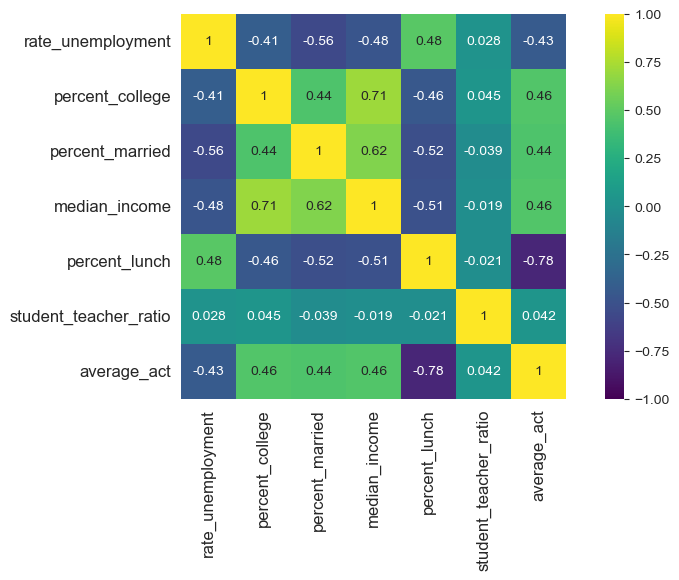

In [60]:
# compute correlation coefficient between all numerical variables
corr_matrix = df[numerical_predictors + ["average_act"]].corr()

# figure size
plt.figure(figsize = (10, 5))

# plot heat map with the correlation coefficients
sns.heatmap(corr_matrix, vmax = 1, vmin = -1, square = True, annot = True, cmap = "viridis")

#label size
plt.tick_params(labelsize = 12)

# display
plt.show()

There is a high correlation between "percent_lunch and average_act" and "median_income and percent_college".

There is no linear correlation between student_teacher_ratio and other variables, particularly average_act. The relationship is statistically weak or random.

#### Make pair plots to explore relationships between the variables

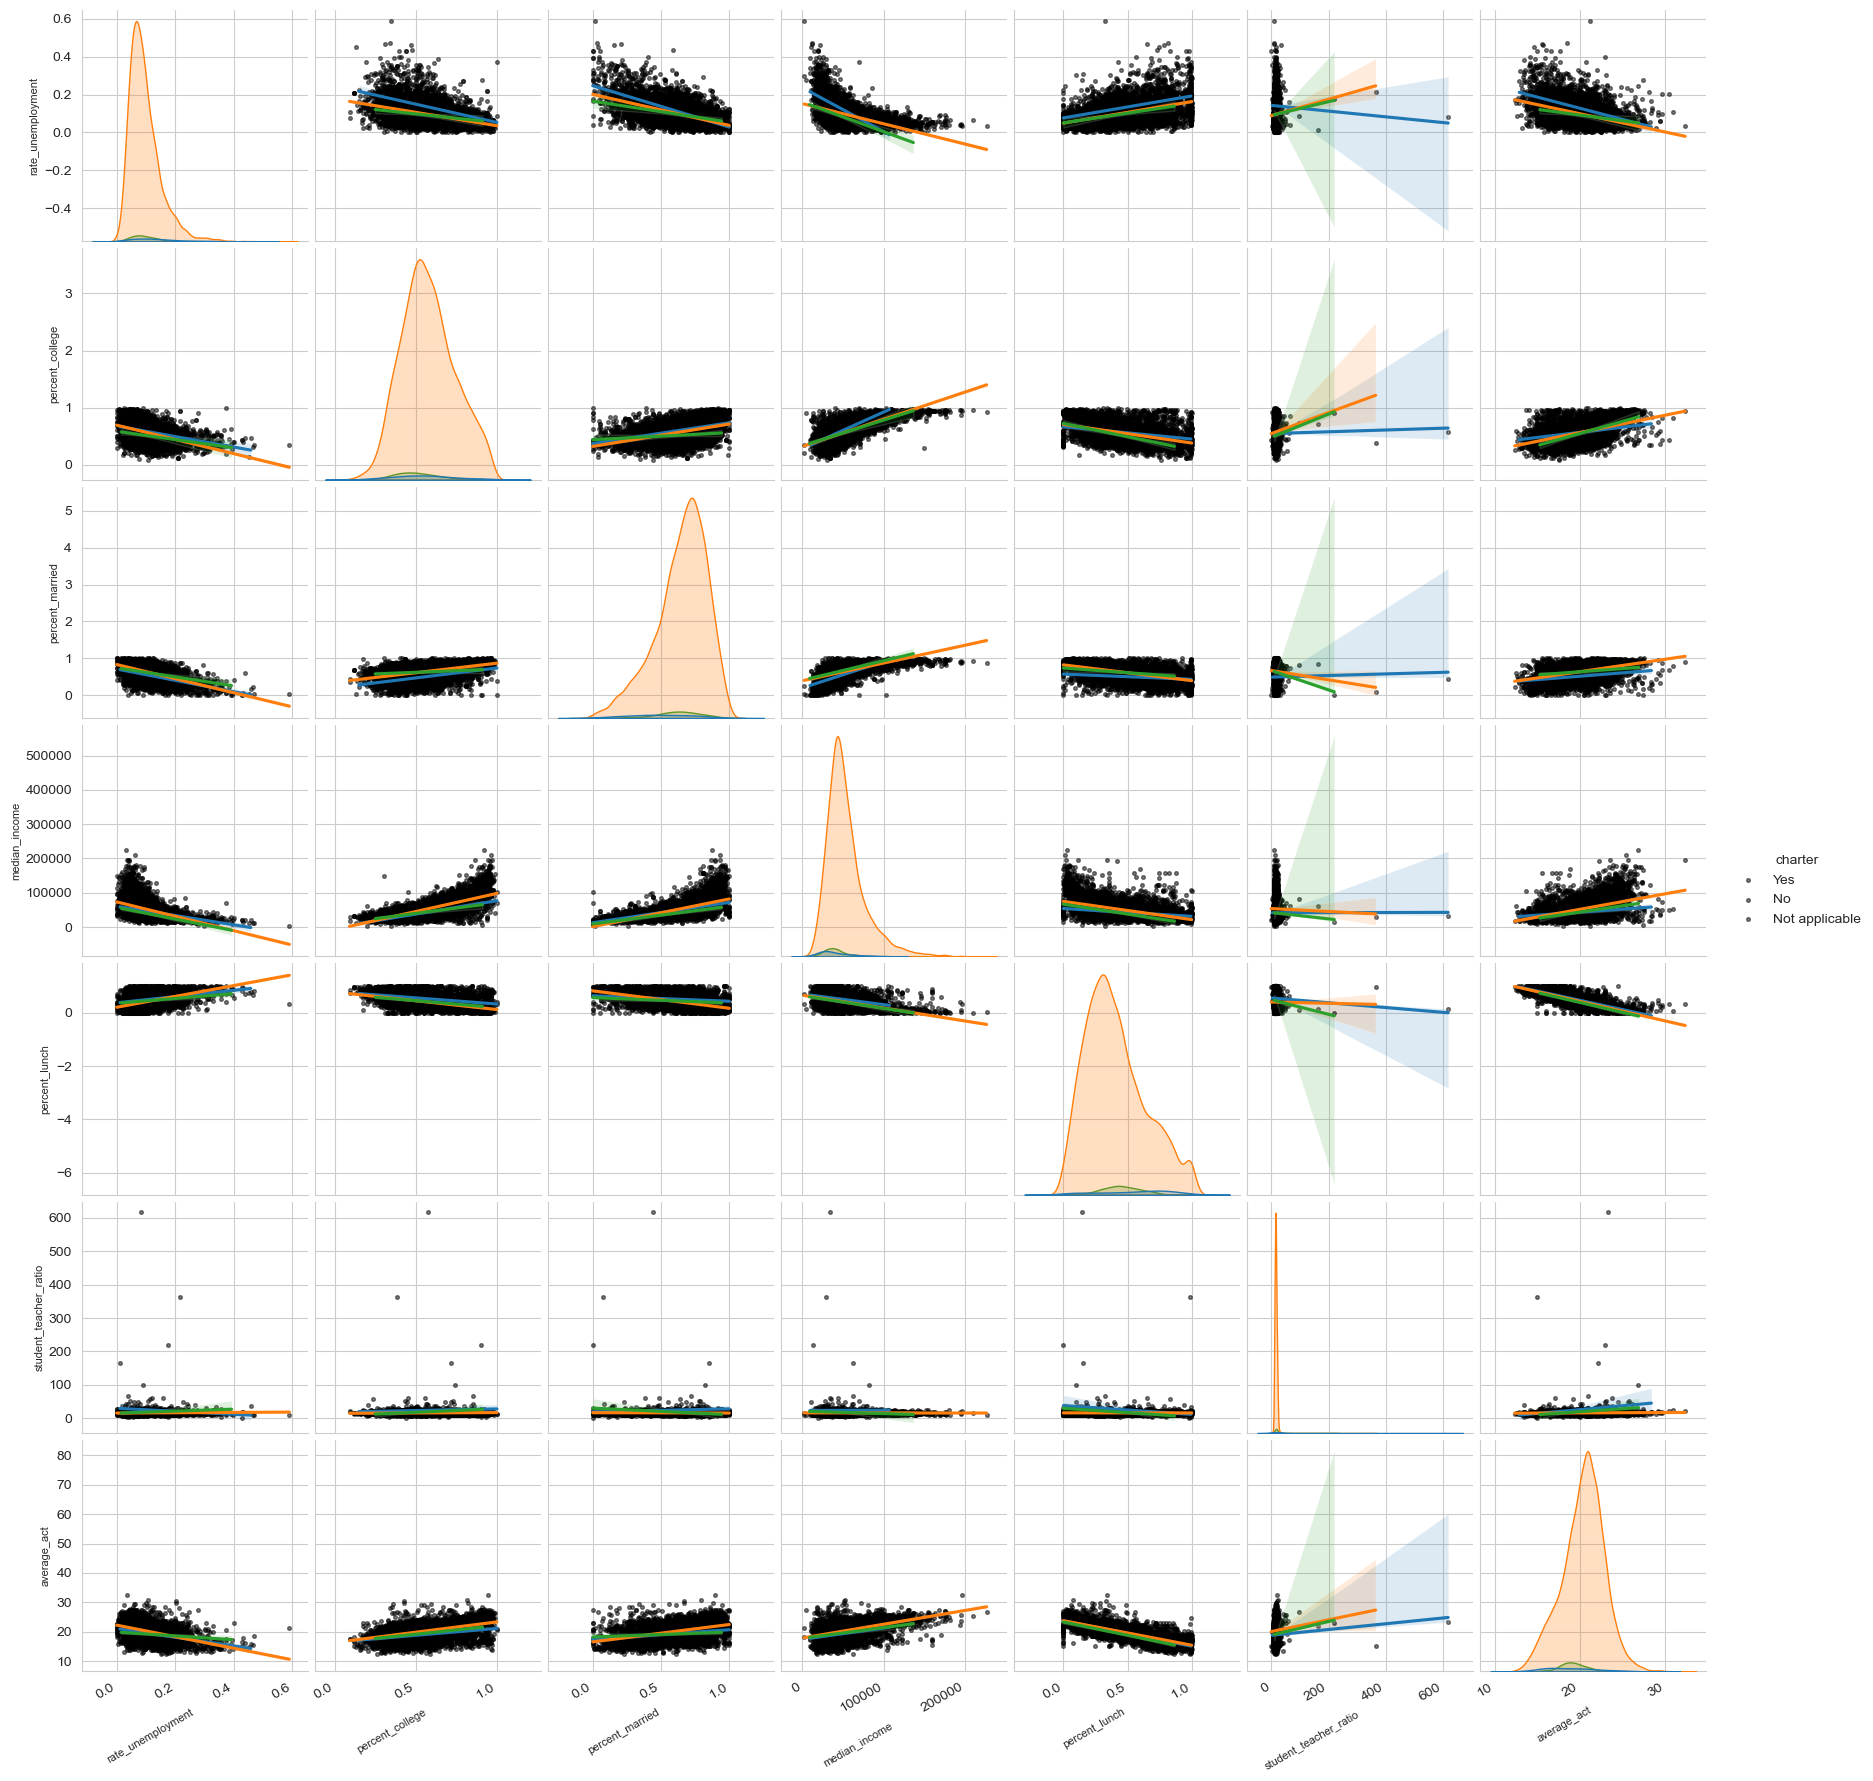

In [61]:
# plot pairplot with charter on hue
fig = sns.pairplot(data = df,
                  vars = numerical_predictors + ['average_act'],
                  hue = 'charter',
                  kind = 'reg',
                  plot_kws = {"scatter_kws": {"alpha": 0.5, "color": "k", "s": 7},
                             })


for ax in fig.axes.flat:
    if ax.get_xlabel() == 'CT Median Household Income':
        ax.ticklabel_format(style = 'sci', axis = 'x', scilimits = (0,0))   # Apply scientific notation
    ax.set_xlabel(ax.get_xlabel(), fontsize = 8, rotation = 30, ha = 'right')
    ax.set_ylabel(ax.get_ylabel(), fontsize = 8)
    
    plt.setp(ax.get_xticklabels(), rotation = 30, ha = 'right')
    
plt.show()

An average_act scores are normally distributed.

There is no relation among student_teacher_ratio and all other variables.

The student_teacher_ratio variable plot falls in a straight line.

#### Identify outliers using boxplot

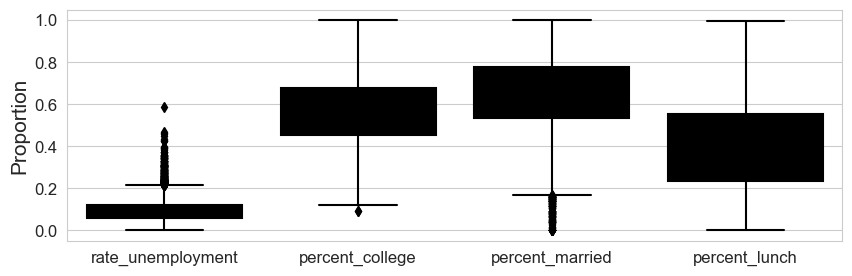

In [63]:
# figure size
plt.figure(figsize = (10,3))

# set numerical_predictors to the variable fraction and remove 'median_income' from it
fractions = list(numerical_predictors)
fractions.remove('median_income')
fractions.remove('student_teacher_ratio')
# plot boxplot
sns.boxplot(data = df[fractions], color = 'k')

# label
plt.ylabel('Proportion', fontsize = 15)

# label size
plt.tick_params(labelsize = 12)

#display
plt.show()

we removed median_income and student_teacher_ratio because its scale or unit range is very different from the other variables plotted.

Including median_income and student_teacher_ratio would make the other boxes look flat or compressed due to scale differences.

So excluding it makes the plot easier to interpret.

Plot boxplot for median income

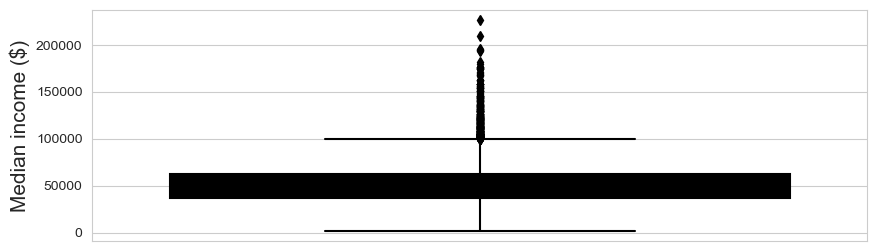

In [64]:
# figure size
plt.figure(figsize = (10,3))

# plot boxplot 
sns.boxplot(data = df, y = 'median_income', color = 'k')

# label
plt.ylabel('Median income ($)', fontsize = 15)

# display
plt.show()

Plot boxplot for student_teacher_ratio

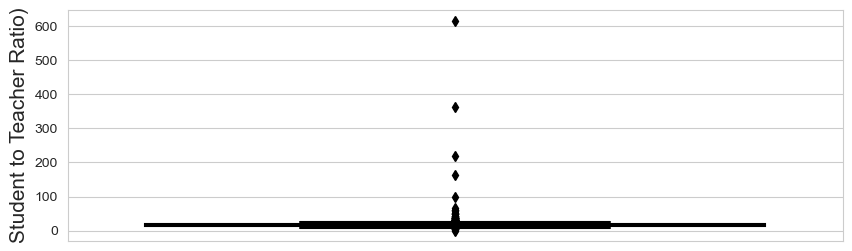

In [65]:
# figure size
plt.figure(figsize = (10,3))

# plot boxplot
sns.boxplot(data = df, y = 'student_teacher_ratio', color = 'k')

# label
plt.ylabel('Student to Teacher Ratio)', fontsize = 15)

# display
plt.show()

## Modeling

plot the regression line and scatter plot

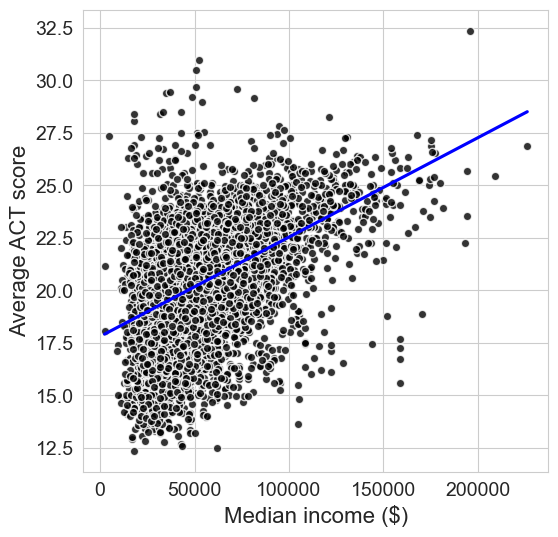

In [66]:
# figure size
plt.figure(figsize = (6,6))

# plot scatter plot with regression lines for median_income and average_act 
sns.regplot(data = df,
           x = 'median_income',
           y = 'average_act',
           color = 'blue',
           ci = False,
           scatter_kws = {'color':'black','edgecolors':'white','linewidths':1})

# Add axis labels
plt.xlabel('Median income ($)', fontsize = 16)
plt.ylabel('Average ACT score', fontsize = 16)

# Increase the fontsize of the tick labels
plt.tick_params(labelsize = 14)

# display
plt.show()

There is a positive linear correlation between median income and average ACT.

Fit the simple linear regression model

In [67]:
model_median_income = smf.ols(formula = 'average_act ~ median_income', data = df).fit()

In [68]:
print(model_median_income.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     1934.
Date:                Wed, 22 Oct 2025   Prob (F-statistic):               0.00
Time:                        16:26:04   Log-Likelihood:                -16043.
No. Observations:                7227   AIC:                         3.209e+04
Df Residuals:                    7225   BIC:                         3.210e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        17.8025      0.063    284.789

R squared is 0.211, which indicates income alone doesn’t capture everything.

p-value is less than 0.001, the relationship isn’t random — it’s statistically meaningful.

Median income is a significant predictor, but not a dominant one — it explains only around 21% of the total variation.

This implies socioeconomic factors matter, but many other influences (school resources, teacher quality, demographics) also shape student outcomes.

#### Numerical assessment of fit accuracy

Compute the R-squared

In [69]:
model_median_income.rsquared

0.2111956909364131

Compute the RMSE

In [70]:
y_hat = model_median_income.predict()

In [71]:
np.sqrt(mean_squared_error(df['average_act'], y_hat)).round(3)

2.228

Compute mean absolute error

In [72]:
mean_absolute_error(df['average_act'], y_hat)

1.712929844948047

Use a residual plot for graphical assessment of model fit

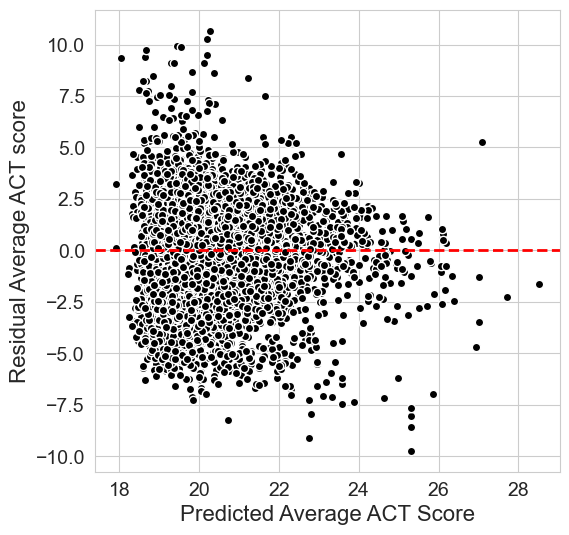

In [73]:
# figure size
plt.figure(figsize = (6,6))
# plot residuals across median income
plt.plot(y_hat, model_median_income.resid, 'ko', mec = 'w')
# add axis line to indicate the error is 0.
plt.axhline(0, color = 'r', linestyle = 'dashed', lw = 2)

# Add axis labels
plt.xlabel('Predicted Average ACT Score', fontsize = 16)
plt.ylabel('Residual Average ACT score', fontsize = 16)

# Increase the fontsize of the tick labels
plt.tick_params(labelsize = 14)

# display
plt.show()

The  points are clustered around the red line, Model may be missing other predictors or interactions.

Some points are spread out, possibly outliers.

Try a quadratic model, plot the regression curves and a scatter plot

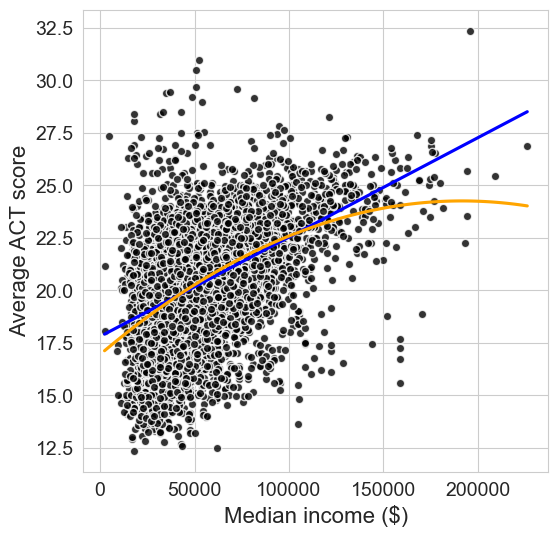

In [74]:
# figure size
plt.figure(figsize = (6,6))

# plot scatter plot with regression lines for median_income and average_act
sns.regplot(data = df,
           x = 'median_income',
           y = 'average_act',
           color = 'blue',
           ci = False,
           scatter_kws = {'color':'black','edgecolors':'white','linewidths':1})

# add quadratic line
sns.regplot(data = df,
           x = 'median_income',
           y = 'average_act',
           order = 2,           # indicate quadratic regression line
           color = 'orange',
           ci = False,
           scatter = False)

# Add axis labels
plt.xlabel('Median income ($)', fontsize = 16)
plt.ylabel('Average ACT score', fontsize = 16)

# Increase the fontsize of the tick labels
plt.tick_params(labelsize = 14)

# display
plt.show()

The two lines overlap, Linear model is sufficient — adding curvature doesn’t add much explanatory power.

ACT scores rise with income up to a point, then level off for quadratic line.

#### Fit a quadratic linear regression model

In [75]:
model_median_income2 = smf.ols(formula = 'average_act ~ median_income + I(median_income**2)', data = df).fit()

In [76]:
model_median_income2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            average_act   R-squared:                       0.219
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     1014.
Date:                Wed, 22 Oct 2025   Prob (F-statistic):               0.00
Time:                        16:26:19   Log-Likelihood:                -16007.
No. Observations:                7227   AIC:                         3.202e+04
Df Residuals:                    7224   BIC:                         3.204e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                16.9453      0.118    143.770      0.000      16.714      17.176
median_income          7.632e-05   3.55e-06     21.489      0.000    6.94e-05    8.33e-05
I(median_income ** 2) -1.991e-10   2.33e-11     -8.562      0.000   -2.45e-10   -1.54e-10
==============================================================================
Omnibus:                      186.734   Durbin-Watson:                   1.302
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              395.686
Skew:                          -0.140   Prob(JB):                     1.20e-86
Kurtosis:                       4.112   Cond. No.                     2.27e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.27e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Slight improvement in the R-squared, explains 0.8% more variance.

Adding the squared term slightly improves model performance, confirming that nonlinearity exists — but not a large one.

Median Income still matters, but the relationship isn’t perfectly linear.

#### Assess the model significance

In [77]:
model_median_income2.pvalues

Intercept                0.000000e+00
median_income            2.429440e-99
I(median_income ** 2)    1.338124e-17
dtype: float64

In [78]:
anova_lm(model_median_income, model_median_income2)

df_resid           ssr  df_diff     ss_diff          F        Pr(>F)
0    7225.0  35864.594445      0.0         NaN        NaN           NaN
1    7224.0  35504.282123      1.0  360.312322  73.312177  1.338124e-17

anova_lm compares nested models to test whether adding extra terms (here, the quadratic term) significantly improves the fit.

Quadratic coefficient had p < 0.001, confirming the curve improves the fit.

Assess the model accuracy

Compute the mean absolute error

In [79]:
mean_absolute_error(df['average_act'], model_median_income2.predict())

1.6972199288206444

Compute the R-squared

In [80]:
model_median_income2.rsquared

0.2191203842573196

Compute Root Mean Squared Error

In [81]:
y_hat = model_median_income.predict()

In [82]:
np.sqrt(mean_squared_error(df['average_act'], y_hat)).round(3)

2.228

#### Residual plot

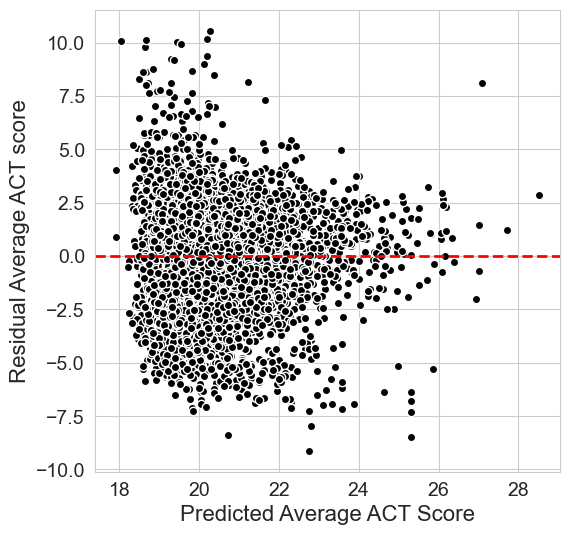

In [83]:
# figure size
plt.figure(figsize = (6,6))

# plot residuals across median income2
plt.plot(y_hat, model_median_income2.resid, 'ko', mec = 'w')
plt.axhline(0, color = 'r', linestyle = 'dashed', lw = 2)

# Add axis labels
plt.xlabel('Predicted Average ACT Score', fontsize = 16)
plt.ylabel('Residual Average ACT score', fontsize = 16)

# Increase the fontsize of the tick labels
plt.tick_params(labelsize = 14)

# display
plt.show()

Quadratic model reduced curvature in residuals seen in the linear model.

#### Multiple linear regression

Fit the multiple linear regression model using all socio-economic variables as predictors

In [84]:
# fit the model
model = smf.ols(formula = 'average_act ~ rate_unemployment + percent_college + percent_married + median_income + percent_lunch + student_teacher_ratio', 
                data = df).fit()

In [85]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            average_act   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     2036.
Date:                Wed, 22 Oct 2025   Prob (F-statistic):               0.00
Time:                        16:27:50   Log-Likelihood:                -13322.
No. Observations:                7227   AIC:                         2.666e+04
Df Residuals:                    7220   BIC:                         2.671e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                22.6013      0.141    160.663      0.000      22.326      22.877
rate_unemployment        -2.3050      0.404     -5.706      0.000      -3.097      -1.513
percent_college           1.6987      0.158     10.760      0.000       1.389       2.008
percent_married          -0.0611      0.134     -0.456      0.648      -0.323       0.201
median_income          6.864e-08   1.21e-06      0.057      0.955    -2.3e-06    2.44e-06
percent_lunch            -7.5927      0.097    -78.414      0.000      -7.782      -7.403
student_teacher_ratio     0.0061      0.002      3.226      0.001       0.002       0.010
==============================================================================
Omnibus:                      865.659   Durbin-Watson:                   1.483
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3087.559
Skew:                           0.583   Prob(JB):                         0.00
Kurtosis:                       5.982   Cond. No.                     1.34e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.34e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The model explains much more variance than the single-variable models(R-squared value went upto 0.629), so including additional socioeconomic variables dramatically improves predictive power.

Strongest predictors: percent_lunch, percent_college, rate_unemployment

Median income and percent_married are not significant after controlling for other factors

Assess the model accuracy

In [86]:
mean_absolute_error(df['average_act'], model.predict())

1.1450188291403485

In [87]:
model.rsquared

0.6285293555324463

In [88]:
y_hat = model.predict()

In [89]:
np.sqrt(mean_squared_error(df['average_act'], y_hat)).round(3)

1.529

Residual plot

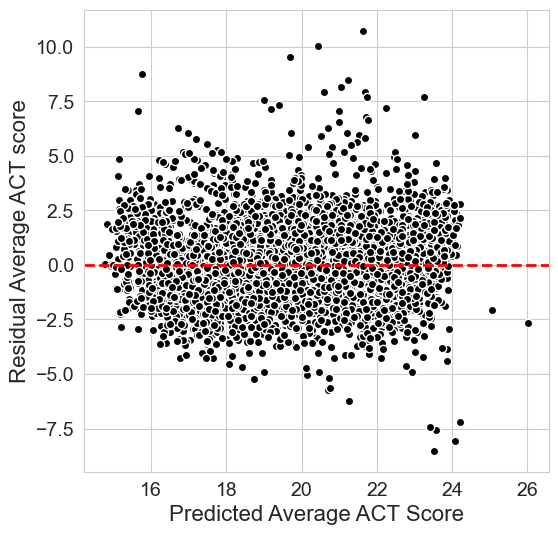

In [90]:
# figure size
plt.figure(figsize = (6,6))

# # plot residual for multilinear regression model
plt.plot(y_hat, model.resid, 'ko', mec = 'w')
plt.axhline(0, color = 'r', linestyle = 'dashed', lw = 2)

# Add axis labels
plt.xlabel('Predicted Average ACT Score', fontsize = 16)
plt.ylabel('Residual Average ACT score', fontsize = 16)

# Increase the fontsize of the tick labels
plt.tick_params(labelsize = 14)

# display
plt.show()

Residuals are more evenly scattered around 0 compared to single-predictor models.

### Fit a reduced model with significant predictors

In [91]:
model_reduced = smf.ols(formula = 'average_act ~ rate_unemployment + percent_college + percent_lunch', 
                data = df).fit()

In [92]:
model_reduced.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            average_act   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     4064.
Date:                Wed, 22 Oct 2025   Prob (F-statistic):               0.00
Time:                        16:33:50   Log-Likelihood:                -13328.
No. Observations:                7227   AIC:                         2.666e+04
Df Residuals:                    7223   BIC:                         2.669e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            22.6402      0.102    220.917      0.000      22.439      22.841
rate_unemployment    -2.1682      0.374     -5.801      0.000      -2.901      -1.436
percent_college       1.7137      0.127     13.504      0.000       1.465       1.963
percent_lunch        -7.5866      0.093    -82.000      0.000      -7.768      -7.405
==============================================================================
Omnibus:                      873.220   Durbin-Watson:                   1.483
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3128.447
Skew:                           0.587   Prob(JB):                         0.00
Kurtosis:                       6.002   Cond. No.                         25.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The model remains highly predictive using only these 3 socioeconomic indicators.

The reduced model is numerically stable and easier to interpret than the full model.

Percent of students on free/reduced lunch (poverty proxy) — largest negative effect

Percent of adults with college education — positive effect

Local unemployment rate — negative effect

Dropped variables (median_income, percent_married, student_teacher_ratio) do not significantly influence ACT after accounting for these three.

Model fit remains strong (R² = 0.628), so these 3 variables explain most of the variation in ACT scores.

In [93]:
mean_absolute_error(df['average_act'], model_reduced.predict())

1.1454617367865267

In [94]:
model_reduced.rsquared

0.6279716422811912

In [95]:
y_hat = model_reduced.predict()

In [96]:
np.sqrt(mean_squared_error(df['average_act'], y_hat)).round(3)

1.53

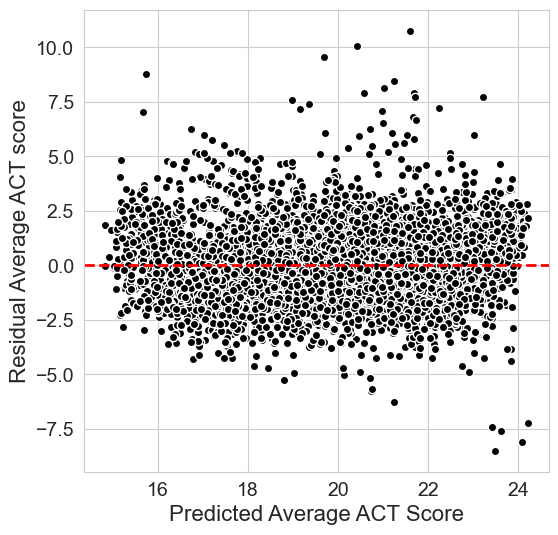

In [97]:
# figure size
plt.figure(figsize = (6,6))

# plot residue for model_reduced
plt.plot(y_hat, model_reduced.resid, 'ko', mec = 'w')
plt.axhline(0, color = 'r', linestyle = 'dashed', lw = 2)

# Add axis labels
plt.xlabel('Predicted Average ACT Score', fontsize = 16)
plt.ylabel('Residual Average ACT score', fontsize = 16)

# Increase the fontsize of the tick labels
plt.tick_params(labelsize = 14)

# display
plt.show()

In [98]:
anova_lm(model_reduced, model)

df_resid           ssr  df_diff    ss_diff         F    Pr(>F)
0    7223.0  16915.026983      0.0        NaN       NaN       NaN
1    7220.0  16889.669414      3.0  25.357569  3.613287  0.012667

## Scaling

Scale the predictor variables in the reduced model to have mean 0 and standard deviation 1 and add them to the dataframe

In [99]:
predictor_variables = ['rate_unemployment', 'percent_college', 'percent_lunch']

In [100]:
scaled_columns = [var + '_normalized' for var in predictor_variables]
scaled_columns

['rate_unemployment_normalized',
 'percent_college_normalized',
 'percent_lunch_normalized']

In [101]:
scaler = StandardScaler().fit(df[predictor_variables])

In [102]:
df[scaled_columns] = scaler.transform(df[predictor_variables])

Check the mean and standard deviation of the transformed data

In [103]:
df[scaled_columns].agg(['mean', 'std']).round(3)

rate_unemployment_normalized  percent_college_normalized  \
mean                          -0.0                         0.0   
std                            1.0                         1.0   

      percent_lunch_normalized  
mean                       0.0  
std                        1.0

Fit the multiple regression models with the normalized predictors

In [104]:
model_normalized = smf.ols(formula = 'average_act ~ rate_unemployment_normalized + percent_college_normalized + percent_lunch_normalized', data = df).fit()

In [105]:
model_normalized.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            average_act   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     4064.
Date:                Wed, 22 Oct 2025   Prob (F-statistic):               0.00
Time:                        16:47:02   Log-Likelihood:                -13328.
No. Observations:                7227   AIC:                         2.666e+04
Df Residuals:                    7223   BIC:                         2.669e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       20.2986      0.018   1127.631      0.000      20.263      20.334
rate_unemployment_normalized    -0.1227      0.021     -5.801      0.000      -0.164      -0.081
percent_college_normalized       0.2826      0.021     13.504      0.000       0.242       0.324
percent_lunch_normalized        -1.7771      0.022    -82.000      0.000      -1.820      -1.735
==============================================================================
Omnibus:                      873.220   Durbin-Watson:                   1.483
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3128.447
Skew:                           0.587   Prob(JB):                         0.00
Kurtosis:                       6.002   Cond. No.                         1.93
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

After scaling, there is no difference in the result but Normalizing confirms which predictors have the largest standardized impact on ACT scores.

#### Compare the accuracy between the original and normalized models

In [106]:
mae_normalized = mean_absolute_error(df['average_act'], model_normalized.predict())
mae_reduced = mean_absolute_error(df['average_act'], model_reduced.predict())

r2_normalized = model_normalized.rsquared
r2_reduced = model_reduced.rsquared

pd.DataFrame({'Mean Absolute Error' : [mae_normalized, mae_reduced], 'R Squared': [r2_normalized, r2_reduced]}, index = ['normalized model', 'reduced model']).round(4)

Mean Absolute Error  R Squared
normalized model               1.1455      0.628
reduced model                  1.1455      0.628

Normalization is only for interpretability (e.g., comparing effect sizes).

Model accuracy is unchanged: MAE and R² are identical.

Predictor importance is easier to visualize in standardized form.

### Conclusion

The socio-economic factors like percent lunch, unemployment rate and number of adults with college degree are the strongest predictor of ACT scores.